# Tarea - Ajuste de curvas
# Bruno Fuentes Navarro-(IC709236)

In [57]:
#Se importan las librerias requeridas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

---
### Problema 1

Los siguientes datos representan el costo en dólares de la electricidad según Western Electricity Coordinating Council desde el 2014 (y su pronóstico para el 2040)

Tomado de:
https://www.quandl.com/data/EIA/AEO_2016_REF_NO_CPP_PRCE_NA_COMM_NA_ELC_NA_WECCRKS_NCNTPKWH_A-Electricity-End-Use-Prices-Commercial-Western-Electricity-Coordinating-Council-Rockies-No-CPP-AEO2016

In [58]:
# Datos obtenidos de la página de quandl
data = np.array([10.051101,  9.259127,  9.444813,  9.557723,  9.977324, 10.298326,
       10.447217, 10.550506, 10.590784, 10.657418, 10.743085, 10.831965,
       10.988435, 11.153055, 11.313326, 11.557165, 11.860136, 12.122511,
       12.356448, 12.611391, 12.814569, 13.111372, 13.357134, 13.559012,
       13.85861 , 14.135924, 14.436149])

1. Ajuste estos datos a polinomios de grado 1 hasta 3 (los datos en $x$ corresponden a los años de 2014 a 2040, sin embargo son valores muy grandes para elevarlos a una potencia, use una representación para estos años, por ejemplo $2014 \rightarrow 0$ y $2040\rightarrow 27$).

2. Muestre las tres curvas ajustadas junto a los datos de los costos en un solo gráfico

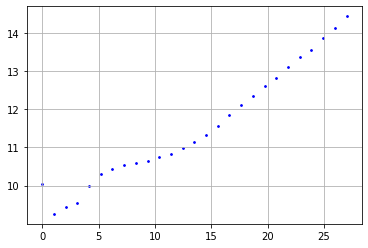

In [59]:
x=np.linspace(0,27,27)
y=data
plt.scatter(x,y,c='b',s=3)
plt.grid()

In [60]:
def fun(beta,x,y):
    f=beta[0]+beta[1]*x
    return np.sum((y-f)**2)

In [61]:
beta0=np.random.rand(2) 
sol=opt.minimize(fun,beta0,args=(x,y)) 
sol.x

array([9.11567633, 0.17975683])

In [62]:
def fun(beta,x,y):
    f=beta[2]*x**2+beta[1]*x+beta[0]
    return np.sum((y-f)**2)

In [63]:
#Dimensión 3 ya que beta[0]+beta[1]x+beta[2]x^2...beta[N]x^N
beta0=np.random.rand(3) 
sol2=opt.minimize(fun,beta0,args=(x,y))
sol2.x

array([9.59128444e+00, 6.98385151e-02, 4.07104869e-03])

In [64]:
def fun(beta,x,y):
    f=beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3
    return np.sum((y-f)**2)

In [65]:
beta0=np.random.rand(4)
sol3=opt.minimize(fun,beta0,args=(x,y))
sol3.x

array([9.56775710e+00, 8.13988600e-02, 2.98020659e-03, 2.69343722e-05])

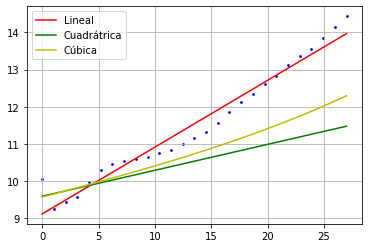

In [66]:
plt.scatter(x,y,c='b',s=3)
f1=sol.x[0]+sol.x[1]*x
f2=sol2.x[0]+sol2.x[1]*x+sol2.x[2]**2
f3=sol3.x[0]+sol3.x[1]*x+sol3.x[2]**2+sol3.x[3]*x**3
plt.plot(x,f1,'r',label='Lineal')
plt.plot(x,f2,'g',label='Cuadrátrica')
plt.plot(x,f3,'y',label='Cúbica')
plt.legend(loc='best')
plt.grid()

---

___
### Problema 2

El archivo `population_data.csv` contiene información histórica anual de México relativa a la población, nacimientos y muertes desde el año 1950 hasta el año 2015. La primer columna corresponde a los años, la segunda a la población, la tercera a los nacimientos y la última a los decesos.

Tomado de: https://en.wikipedia.org/wiki/Demographics_of_Mexico.

Importe estos datos usando la función `read_csv` del paquete `pandas`

1. Usando los años como variable independiente $x$ y la población como variable dependiente $y$, ajustar polinomios de grado 1 hasta grado 3.

    * Mostrar en un solo gráfico los datos de población contra los años, y los polinomios ajustados.

    * Graficar el error cuadrático acumulado contra el número de términos.

2. Repetir el punto 1 usando los nacimientos como variable dependiente $y$. Grafique las curvas ajustadas junto con los datos de nacimientos. Vea en un gráfico el error acumulado.

### El archivo fue descargado de la misma pagina brindada de Wikipedia

In [67]:
data = pd.read_csv('population_data.csv')
print(data)

     Año  Poblacion  Nacimientos  Muertes
0   1950   28296000      1174947   418430
1   1951   29110000      1183788   458238
2   1952   29980000      1195209   408823
3   1953   30904000      1261775   446127
4   1954   31880000      1339837   378752
..   ...        ...          ...      ...
61  2011  115683000      2586287   590693
62  2012  117054000      2498880   602354
63  2013  118395000      2478889   623599
64  2014  119713000      2463420   633641
65  2015  121005000      2353596   655694

[66 rows x 4 columns]


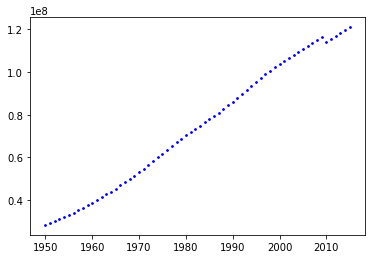

In [68]:
x=data['Año']
y=data['Poblacion']
plt.scatter(x,y,c='b',s=3)


In [69]:
def fun(beta,x,y):
    f=beta[1]*x+beta[0]
    return np.sum((y-f)**2)
beta0=np.random.rand(2) 
sol=opt.minimize(fun,beta0,args=(x,y)) 
sol.x

array([6937455.82883926,   34117.37181688])

In [70]:
def fun(beta,x,y):
    f=beta[2]*x**2+beta[1]*x+beta[0]
    return np.sum((y-f)**2)
beta0=np.random.rand(3) 
sol2=opt.minimize(fun,beta0,args=(x,y))
sol2.x

array([-2.40006894e+07, -1.44610290e+06,  7.54379554e+02])

In [71]:
def fun(beta,x,y):
    f=beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3
    return np.sum((y-f)**2)
beta0=np.random.rand(4)
sol3=opt.minimize(fun,beta0,args=(x,y))
sol3.x

array([-2.16105435e+03, -4.00344779e+04, -3.33915841e+02,  1.88207313e-01])

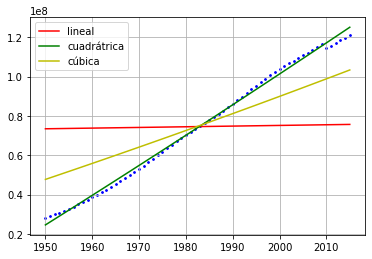

In [72]:
plt.scatter(x,y,c='b',s=3)
f1=sol.x[0]+sol.x[1]*x
f2=sol2.x[0]+sol2.x[1]*x+sol2.x[2]*x**2
f3=sol3.x[0]+sol3.x[1]*x+sol3.x[2]*x**2+sol3.x[3]*x**3
plt.plot(x,f1,'r',label='lineal')
plt.plot(x,f2,'g',label='cuadrátrica')
plt.plot(x,f3,'y',label='cúbica')
plt.legend(loc='best')
plt.grid()

## Ambas funciones se alinean pero se muestran ambas en el gráfico

In [73]:
sol.fun, sol2.fun, sol3.fun

(5.482021192133458e+16, 211768969945741.66, 1.1604802791681514e+16)

## El cesgo de error entre las funciones lineal, cúbica y cuadratica es significativo porque se usaron grandes numeros.

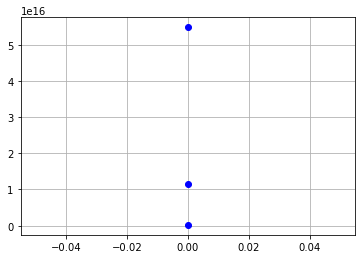

In [74]:
plt.plot(sol.fun,'ob')
plt.plot(sol2.fun,'ob')
plt.plot(sol3.fun,'ob')
plt.grid()

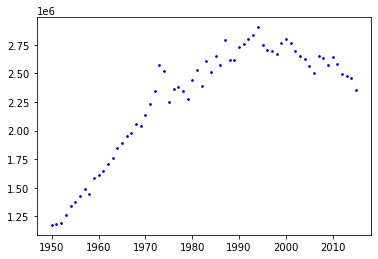

In [75]:
y=data['Nacimientos']
plt.scatter(x,y,c='b',s=3)

In [76]:
def fun(beta,x,y):
    f=beta[1]*x+beta[0]
    return np.sum((y-f)**2)
beta0=np.random.rand(2) 
sol=opt.minimize(fun,beta0,args=(x,y)) 
sol.x

array([-4.12228293e+07,  2.19425022e+04])

In [77]:
def fun(beta,x,y):
    f=beta[2]*x**2+beta[1]*x+beta[0]
    return np.sum((y-f)**2)
beta0=np.random.rand(3) 
sol2=opt.minimize(fun,beta0,args=(x,y))
sol2.x

array([-4.34183817e+04, -1.95334718e+04,  1.04425235e+01])

In [78]:
def fun(beta,x,y):
    f=beta[0]+beta[1]*x+beta[2]*x**2+beta[3]*x**3
    return np.sum((y-f)**2)
beta0=np.random.rand(4)
sol3=opt.minimize(fun,beta0,args=(x,y))
sol3.x

array([-1.65949202e+04, -1.10084483e+03, -7.96400291e+00,  4.59070807e-03])

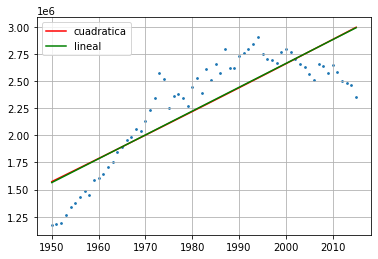

In [79]:
plt.scatter(x,y,s=3)
f2=sol2.x[0]+sol2.x[1]*x+sol2.x[2]*x**2
plt.plot(x,f2,'r',label='cuadratica')
f=sol.x[0]+sol.x[1]*x
plt.plot(x,f,'g',label='lineal')
plt.legend(loc='best')
plt.grid()

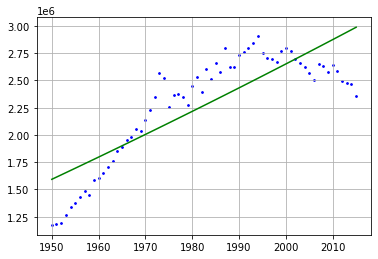

In [80]:
plt.scatter(x,y,c='b',s=3)
f3=sol3.x[0]+sol3.x[1]*x+sol3.x[2]*x**2+sol3.x[3]*x**3
plt.plot(x,f3,'g',label='cúbica')
plt.grid()

In [81]:
sol.fun, sol2.fun, sol3.fun

(4738000198809.667, 4852378912098.38, 4957230703006.946)

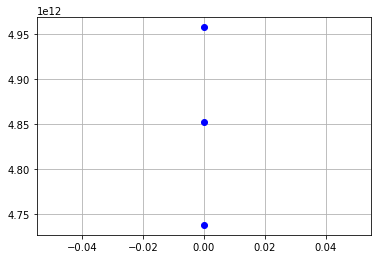

In [82]:
plt.plot(sol.fun,'ob')
plt.plot(sol2.fun,'ob')
plt.plot(sol3.fun,'ob')
plt.grid()

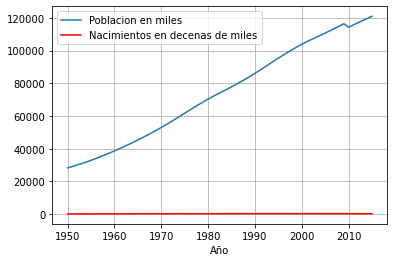

In [27]:
# Se muestra la gráfica. Vea como los datos son escalados, esto le ayudará en el cálculo
# de la regresión.

plt.plot(data.values[:,0],data.values[:,1]/1000,label=data.columns[1]+' en miles')
plt.plot(data.values[:,0],data.values[:,2]/10000,'r',label=data.columns[2]+' en decenas de miles')
plt.legend(loc=2)
plt.xlabel(data.columns[0])
plt.grid()

---